------------
![Bluemetrica](../bluemetrica_large.png)

----------

# Wykresy Matplotlib

W tym skrypcie poznamy zasady tworzenia wykresów za pomocą biblioteki `matplotlib`.
Jest to główna biblioteka Pythona do tworzenia wykresów, która działa obiektowo i daje nam bardzo wiele możliwości, niestety często stworzenie nawet prostego wykresu wymaga kilku linijek kodu i nie jest intuicyjne.

Dokumentacja:
https://matplotlib.org

Palety kolorów:
https://matplotlib.org/examples/color/colormaps_reference.html

Style:
https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

Galeria przykładów:
https://matplotlib.org/gallery.html

Import bibliotek:

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Dane

In [59]:
df = pd.read_csv("../data/storesales.csv", )

In [ ]:
df.Date = pd.to_datetime(df.Date)

In [65]:
df = df.sort_values(by = ['Date', "Store"])

## Matplotlib

Biblioteka stworzona na wzór wykresów w Matlabie. Pozwala nam na tworzenie wielu typów wykresów, ma bardzo szeroką funkcjonalność, ale korzystanie z niej nie jest takie intuicyjne.

 http://matplotlib.org/
 
 **Pierwszy wykres:**

In [66]:
x = np.linspace(0, 5, 11)
y = x ** 2

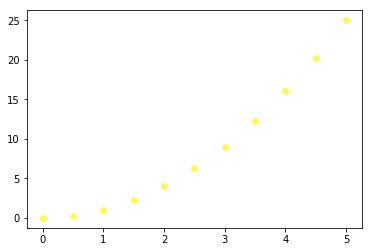

In [67]:
#plt.plot(x, y, "g-", linewidth = 4)

#plt.plot(x, y, color='#fff567', marker='o')
plt.scatter(x, y, color='#fff567', marker='o')

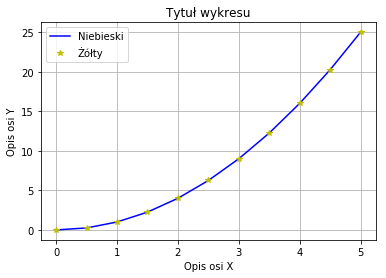

In [68]:
plt.plot(x, y, 'b-', label = "Niebieski") # 'r' kolor czerwony - red
plt.plot(x, y, 'y*', label = "Żółty")
plt.xlabel('Opis osi X')
plt.ylabel('Opis osi Y')
plt.title('Tytuł wykresu')

plt.grid()
plt.legend()

plt.show() # wyświetlenie wykresu

#### Wykres na naszych danych

Odfiltrujemy sprzedaż ze sklepu nr 39 z roku 2013, tylko dni, gdy sklep był otwarty.

In [69]:
df2 = df[(df['Store'] == 39) & (df['year'] == 2013) & (df['Open'] == 1)]

Sales i Date

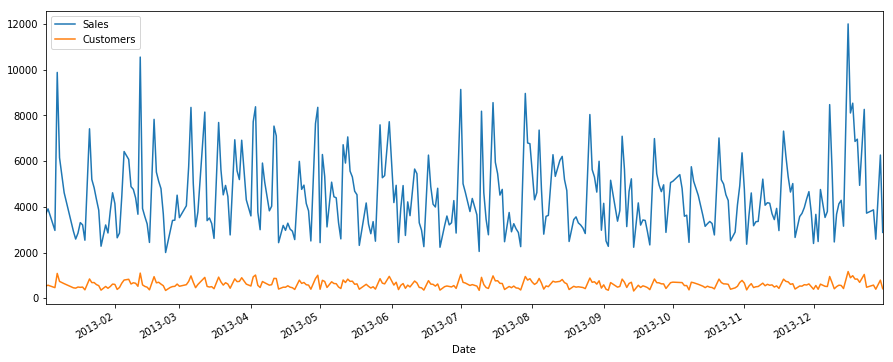

In [70]:
# to samo w pandas
df2.set_index('Date')[['Sales', 'Customers']].plot(figsize = (15, 6))

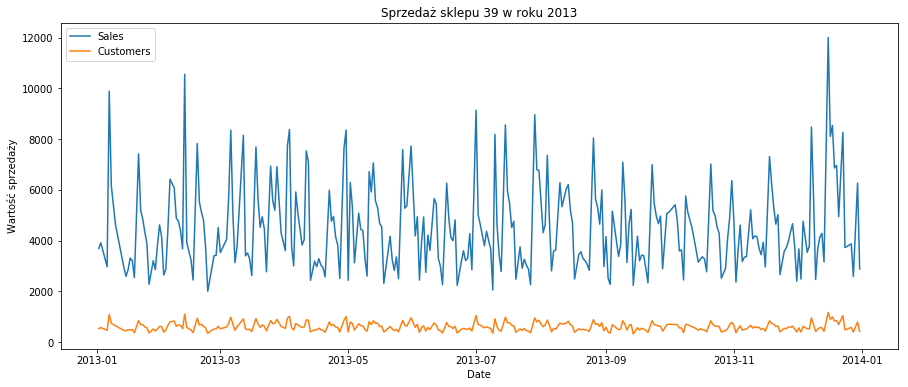

In [71]:
plt.figure(figsize = (15, 6)) # figsize = (12,8) zmieniam rozmiar lub dpi = 300 rozdzielczość wykresu

plt.plot(df2['Date'], df2['Sales']) 
plt.plot(df2['Date'], df2['Customers']) 
plt.xlabel('Date')
plt.ylabel('Wartość sprzedaży')
plt.title('Sprzedaż sklepu 39 w roku 2013')
plt.legend()
plt.show() # wyświetlenie wykresu

### Dwa+ wykresy obok siebie

Matplotlib umożliwia nam stworzenie wielu wykresów obok siebie/pod sobą/na sobie.

`plt.subplot(wiersze, kolumny, ktory to wykres)`

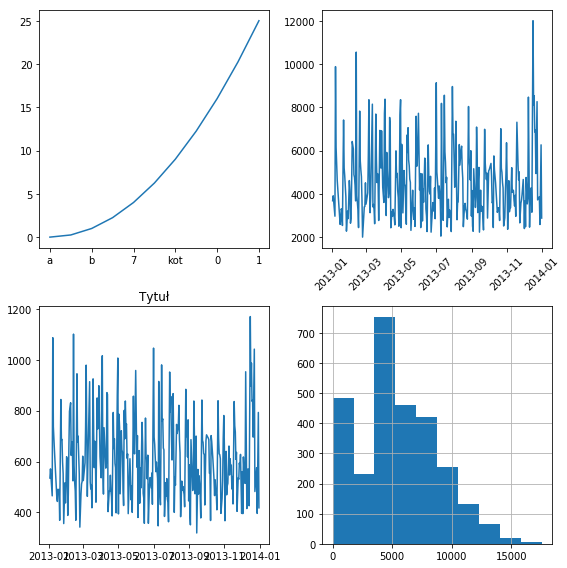

In [85]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.xticks(ticks= range(6), labels = ["a", "b", 7, "kot", 0, 1])

plt.subplot(2, 2, 2)
plt.plot(df2['Date'], df2['Sales']) 
plt.xticks(rotation = 45)

plt.subplot(2, 2, 3)
plt.plot(df2['Date'], df2['Customers']) 
plt.title("Tytuł")

plt.subplot(2, 2, 4)
df.Sales.hist()

plt.tight_layout()
plt.savefig("kafelki.png")

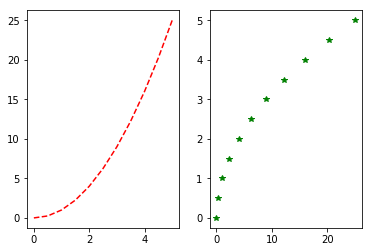

In [86]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*')

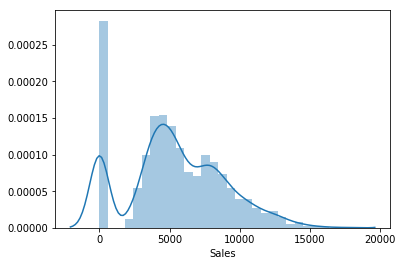

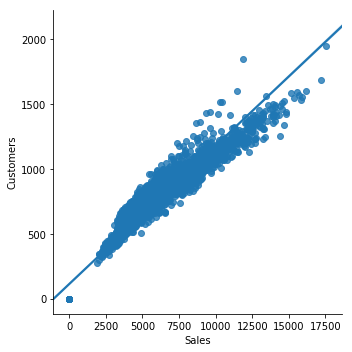

In [87]:
# W seabornie też możemy tworzyć kilka wykresów w jednej komórce
import seaborn as sns

sns.distplot(df['Sales'])
sns.lmplot(x = 'Sales', y = 'Customers', data = df)


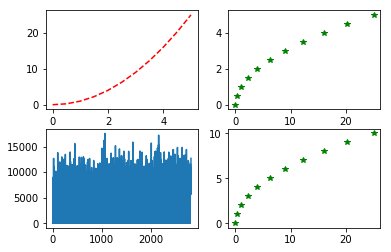

In [64]:
plt.subplot(2, 2, 1)
plt.plot(x, y, 'r--')

plt.subplot(2, 2, 2)
plt.plot(y, x, 'g*')

plt.subplot(2, 2, 3)
df['Sales'].plot()

plt.subplot(2, 2, 4)
plt.plot(y, x*2, 'g*')

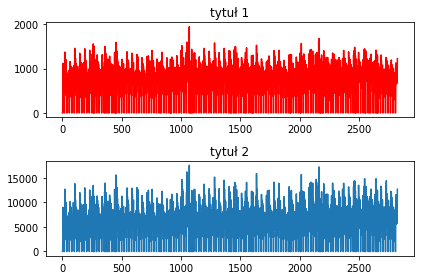

In [70]:
plt.subplot(2, 1, 1)
df['Customers'].plot(color = 'red')
plt.title("tytuł 1")

plt.subplot(2, 1, 2)
df['Sales'].plot()
plt.title("tytuł 2")

plt.tight_layout() # automatycznie rozsuwa wykresy, etykiety na siebie nie nachodzą

### Obiektowe budowanie wykresów w matplotlib

Text(0.5,1,'Tytuł małego wykresu')

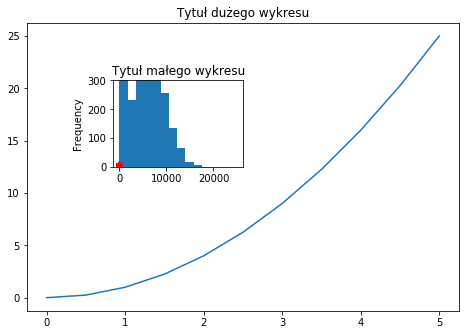

In [88]:
# inicjalizujemy wykres
fig = plt.figure()

# dodajemy osie
ax = fig.add_axes([0, 0, 1 , 1]) # wymiary osi na wykresie
ax2 = fig.add_axes([0.2, 0.5, 0.3, 0.3]) # wymiary osi na wykresie

# rysujemy
ax.plot(x, y)

ax2.plot(y*1000, -x*1000, 'g*-')
ax2.plot(y, 2*x, 'r*-')
df['Sales'].plot(kind = 'hist', ax = ax2)
ax2.set_ylim([0, 300])

ax.set_title("Tytuł dużego wykresu")
ax2.set_title("Tytuł małego wykresu")

Text(0.5, 1.0, 'Dzieło sztuki')

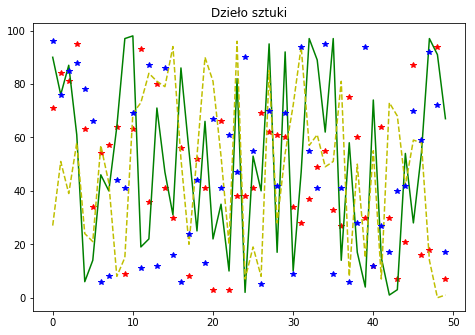

In [89]:
fig = plt.figure()
# dodajemy osie
ax = fig.add_axes([0, 0, 1 , 1]) # wymiary osi na wykresie

style = ["r*", "g-", "y--", "b*"]

# rysujemy
for i, j in zip(range(4), style):
    x = list(range(50))
    y = list(np.random.randint(0, 100, 50))
    
    ax.plot(x, y, j)

ax.set_title("Dzieło sztuki")

### Iteracja przez osie

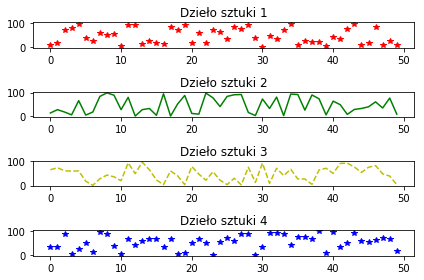

In [90]:
fig, axes = plt.subplots(nrows= 4, ncols= 1)

style = ["r*", "g-", "y--", "b*"]

# rysujemy
for ax, i, j in zip(axes, range(4), style):
    x = list(range(50))
    y = list(np.random.randint(0, 100, 50))
    
    ax.plot(x, y, j)
    ax.set_title("Dzieło sztuki {}".format(i+1))
    
plt.tight_layout()

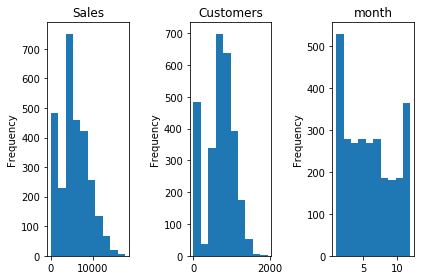

In [91]:
fig, axes = plt.subplots(nrows= 1, ncols= 3)

zmienne = ['Sales', 'Customers', 'month']

# rysujemy
for ax, zm in zip(axes, zmienne):
    df[zm].plot.hist(ax = ax) # histogram z pandas

    ax.set_title(zm)
    
plt.tight_layout()